**01 Intial Data from yfinance**
- Initially we gathered the ticker list from wikipedia
- Using that ticker list we grabbed the data for all the tickers from yahoo finance



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
%cd /content/drive/MyDrive/Colab Notebooks/3-1

/content/drive/MyDrive/Colab Notebooks/3-1


In [3]:
# pandas for dealing with DataFrames
import pandas as pd
# request library
import requests
# yfinance is where we will pull our data from
import yfinance as yf
# numpy for using mathematical functions
import numpy as np
# matplotlib for visualization
import matplotlib.pyplot as plt

In [4]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
tickers = pd.read_html(r.text)[0]
tickers.head()

tickers = tickers.Symbol.to_list()
tickers = [i.replace('.', '-') for i in tickers]

tickers = pd.DataFrame(tickers)
tickers.to_csv("./csvs/tickers_spy.csv", index = None)

tickers = pd.read_csv("./csvs/tickers_spy.csv")
tickers = tickers.values.tolist()
flat_tickers = [item for sublist in tickers for item in sublist]

In [5]:
stocks = yf.download(flat_tickers, start = '2020-01-01', end = '2023-05-29')

[*********************100%***********************]  503 of 503 completed


In [6]:
stocks_adj = stocks.loc[:, 'Adj Close']
stocks_vol = stocks.loc[:, 'Volume']

In [7]:
stocks.to_csv("./csvs/stocks_spy_data.csv")

In [8]:
stocks_adj.dropna(axis=1, inplace=True)
stocks_adj

<ipython-input-8-07f580afa26c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_adj.dropna(axis=1, inplace=True)


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,84.108368,28.982893,148.484283,73.347939,76.495056,80.829391,82.122169,43.400002,199.948425,334.429993,...,142.082214,57.058815,58.530788,54.990799,76.566856,95.838882,141.331970,259.140015,46.758442,131.088684
2020-01-03,82.757935,27.548195,148.493591,72.634850,75.768951,79.812851,81.121025,43.349998,199.615433,331.809998,...,139.974716,57.333229,58.060230,54.382263,77.017525,95.538712,140.962509,256.049988,46.098618,131.108231
2020-01-06,83.002579,27.219410,146.053162,73.213623,76.366928,80.981392,81.546036,43.520000,198.311935,333.709991,...,139.697678,57.250896,58.506023,54.681705,76.518921,95.482437,140.147858,258.010010,45.536877,130.101669
2020-01-07,83.257011,27.119778,144.320663,72.869308,75.931267,80.401894,81.092690,43.160000,194.030365,333.390015,...,140.360596,57.131989,58.027225,54.971478,76.231255,95.651283,140.024719,256.470001,45.260460,130.541397
2020-01-08,84.079002,27.737495,142.662628,74.041496,76.469421,81.180908,81.423256,42.730000,194.410980,337.869995,...,141.241180,57.077110,57.152145,55.551041,76.490120,95.820129,141.701385,247.639999,45.706287,130.258011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,129.089996,14.380000,119.440002,174.199997,144.899994,172.250000,108.250000,73.500000,290.950012,372.049988,...,108.410004,65.879997,104.970001,39.410000,103.991814,134.283401,135.270004,280.130005,28.090000,179.520004
2023-05-23,128.639999,14.070000,116.779999,171.559998,142.520004,171.259995,105.739998,73.169998,288.100006,370.420013,...,101.879997,65.589996,106.400002,38.049999,103.792480,130.839462,130.320007,271.220001,29.389999,172.669998
2023-05-24,120.989998,13.800000,115.230003,171.839996,141.149994,171.059998,104.040001,71.769997,286.820007,365.760010,...,101.089996,65.129997,107.589996,37.130001,100.722755,130.262161,128.619995,261.390015,28.969999,169.139999


In [9]:
stocks_vol.dropna(axis=1, inplace=True)
stocks_vol

<ipython-input-9-b1ec796a70f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_vol.dropna(axis=1, inplace=True)


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,1410500,6451100,944900,135480400,5639200,817600,4969000,1376700,2431100,1990100,...,3006500,2915400,12456400,1556600,869500,1369900,1083972,387800,1528700,1576700
2020-01-03,1118300,14008900,567000,146322800,5988500,801500,4747000,784700,1802100,1577600,...,1760500,2422500,17386900,910000,795100,1145500,992405,305300,1215800,1274000
2020-01-06,1993200,6105800,880200,118387200,6786600,765000,5631700,1270900,2841400,1874700,...,1357900,2217100,20081900,751000,817300,1454100,972423,322600,1217500,2334100
2020-01-07,1684700,6105900,1129500,108872000,7242500,845300,3408100,1334800,3097400,2500800,...,1722100,1861100,17387700,792600,662200,1388600,934519,236300,1450900,1224500
2020-01-08,1847600,10496800,825700,132079200,7696800,1182000,5693900,1285200,2271300,2248500,...,1176200,4828900,15137700,1001500,1083200,1521500,936064,689600,2396000,1766700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,1764500,28517200,1117300,43570900,3867300,1651900,2809500,2533100,2044100,2627100,...,1733500,1857400,12882000,2880800,845600,1644400,1244300,256600,8414900,1911400
2023-05-23,2784400,28899400,1390500,50747300,5121900,1348700,4337800,1735700,2219800,2967700,...,3877500,3966300,14394400,2093900,11602900,1828300,1153700,359600,9434400,2301700
2023-05-24,6850400,30501800,866400,45143500,4143500,1579000,4507600,1432600,2815100,2666600,...,2342700,3562000,16340300,1555000,4165600,1352200,1169000,467500,5329200,2437900


In [10]:
stocks_adj.to_csv("./csvs/stocks_adj_close.csv")
stocks_vol.to_csv("./csvs/stocks_vol.csv")

**Making a Database of Individual Ticker**

- Dropped all the columns with threshold value 3085 i-e all the companies which came to market after 2010-01-010

- Dropped all the null values
- Made individual ticker database for later use
- Added percent change and Normalized Adjusted Close columns in the database

In [11]:
!pip install yahoo-fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.0 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=d0da0f1bcf5feecfb4a0aed8019a00321aef930cf7ad95eaffa3946626059288
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24570 sha256=6fff30a5c29c6dc997006882529e3d202ae016e8e29774827daf21bfd24f610b
  Stored in directory: /root/.cache/pip/wheels/70/4b/f0/e

In [12]:
# Ignoring Future Warnings
import warnings
warnings.simplefilter(action='ignore')
import pandas_datareader.data as web
import pandas as pd
from yahoo_fin import stock_info as si
import datetime as dt

# yfinance is where we will pull our data from
import yfinance as yf

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

In [14]:
# Make a new ticker list with 197 stocks
tickers = list(stocks['Adj Close'].columns)
print(len(tickers))
# saving into csv
tickers = pd.DataFrame(tickers)
tickers.to_csv("./csvs/tickers_updated.csv", index = None)

503


In [15]:
# converting it back into list for use in the for loop
#tickers = tickers[0].values.tolist()

stocks_adj_close = stocks_adj[:]
stocks = pd.read_csv("./csvs/stocks_spy_data.csv", header = [0,1], index_col = [0], parse_dates = [0])

tickers = list(stocks_adj.columns)
ticker = [item for sublist in tickers for item in sublist]

# initiating a list of columns 
columns = ['Close', 'High', 'Low', 'Open', 'Volume', 'Percent Change']

# Creating csv files for individual stocks with first column to be Adj Close
for ticker in tickers:
    df = stocks_adj_close[ticker]
    df.to_csv(f'./stock_data/{ticker}.csv')

# Merging all the columns for individual tickers
for ticker in tickers:
    df = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    df.rename(columns = {ticker : "Adj Close"}, inplace = True)
    df = pd.merge(df,stocks[columns[0]][ticker],left_on='Date',right_on='Date',how='right')
    df = pd.merge(df,stocks[columns[1]][ticker],left_on='Date',right_on='Date',how='right')
    df = pd.merge(df,stocks[columns[2]][ticker],left_on='Date',right_on='Date',how='right')
    df = pd.merge(df,stocks[columns[3]][ticker],left_on='Date',right_on='Date',how='right')
    df = pd.merge(df,stocks[columns[4]][ticker],left_on='Date',right_on='Date',how='right')
    df['Percent Change'] = df['Adj Close'].pct_change()

    df.to_csv(f'stock_data/{ticker}.csv')

# Renaming the columns from Columns list
for ticker in tickers:
    df = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0])
    for i in range(0, len(columns)-1):
        df.rename(columns={df.columns[i+1]: columns[i]},inplace=True)
    df.to_csv(f'stock_data/{ticker}.csv')

**03 Picking the Best Performers**
- From these stocks we compared each stocks returns over the S&P return over the exact same time period
- This gave us a ratio of each stocks return over the S&Ps return as a whole
- We then took the top 30% performers to analyze for creating the portfolios.
- *We* now had a group of 133 companies to analyze allowing for faster and more accurate analysis in terms of profitability.



In [16]:
import pandas_datareader.data as web
import pandas as pd

In [17]:
# Visualization
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")

# Reading the stocks_adj_close.csv
stocks = pd.read_csv("./csvs/stocks_adj_close.csv", index_col = [0], parse_dates = [0])
stocks

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,84.108368,28.982893,148.484283,73.347939,76.495056,80.829391,82.122169,43.400002,199.948425,334.429993,...,142.082214,57.058815,58.530788,54.990799,76.566856,95.838882,141.331970,259.140015,46.758442,131.088684
2020-01-03,82.757935,27.548195,148.493591,72.634850,75.768951,79.812851,81.121025,43.349998,199.615433,331.809998,...,139.974716,57.333229,58.060230,54.382263,77.017525,95.538712,140.962509,256.049988,46.098618,131.108231
2020-01-06,83.002579,27.219410,146.053162,73.213623,76.366928,80.981392,81.546036,43.520000,198.311935,333.709991,...,139.697678,57.250896,58.506023,54.681705,76.518921,95.482437,140.147858,258.010010,45.536877,130.101669
2020-01-07,83.257011,27.119778,144.320663,72.869308,75.931267,80.401894,81.092690,43.160000,194.030365,333.390015,...,140.360596,57.131989,58.027225,54.971478,76.231255,95.651283,140.024719,256.470001,45.260460,130.541397
2020-01-08,84.079002,27.737495,142.662628,74.041496,76.469421,81.180908,81.423256,42.730000,194.410980,337.869995,...,141.241180,57.077110,57.152145,55.551041,76.490120,95.820129,141.701385,247.639999,45.706287,130.258011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,129.089996,14.380000,119.440002,174.199997,144.899994,172.250000,108.250000,73.500000,290.950012,372.049988,...,108.410004,65.879997,104.970001,39.410000,103.991814,134.283401,135.270004,280.130005,28.090000,179.520004
2023-05-23,128.639999,14.070000,116.779999,171.559998,142.520004,171.259995,105.739998,73.169998,288.100006,370.420013,...,101.879997,65.589996,106.400002,38.049999,103.792480,130.839462,130.320007,271.220001,29.389999,172.669998
2023-05-24,120.989998,13.800000,115.230003,171.839996,141.149994,171.059998,104.040001,71.769997,286.820007,365.760010,...,101.089996,65.129997,107.589996,37.130001,100.722755,130.262161,128.619995,261.390015,28.969999,169.139999


In [18]:
import yfinance as yf
yf.pdr_override()

In [19]:
# Getting the tickers list
tickers = list(stocks.columns)
start = '2020-01-01'
end = '2022-01-01'

# Load sp500_df return data for comparing the returns of individual stocks
sp500_df = web.DataReader('^GSPC',start, end)
sp500_df['Percent Change'] = sp500_df['Adj Close'].pct_change()
sp500_return = (sp500_df['Percent Change'] + 1).cumprod()[-1]

[*********************100%***********************]  1 of 1 completed


In [20]:
stocks_backtest = stocks.loc[:'2022-01-01',:]
stocks_backtest

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,84.108368,28.982893,148.484283,73.347939,76.495056,80.829391,82.122169,43.400002,199.948425,334.429993,...,142.082214,57.058815,58.530788,54.990799,76.566856,95.838882,141.331970,259.140015,46.758442,131.088684
2020-01-03,82.757935,27.548195,148.493591,72.634850,75.768951,79.812851,81.121025,43.349998,199.615433,331.809998,...,139.974716,57.333229,58.060230,54.382263,77.017525,95.538712,140.962509,256.049988,46.098618,131.108231
2020-01-06,83.002579,27.219410,146.053162,73.213623,76.366928,80.981392,81.546036,43.520000,198.311935,333.709991,...,139.697678,57.250896,58.506023,54.681705,76.518921,95.482437,140.147858,258.010010,45.536877,130.101669
2020-01-07,83.257011,27.119778,144.320663,72.869308,75.931267,80.401894,81.092690,43.160000,194.030365,333.390015,...,140.360596,57.131989,58.027225,54.971478,76.231255,95.651283,140.024719,256.470001,45.260460,130.541397
2020-01-08,84.079002,27.737495,142.662628,74.041496,76.469421,81.180908,81.423256,42.730000,194.410980,337.869995,...,141.241180,57.077110,57.152145,55.551041,76.490120,95.820129,141.701385,247.639999,45.706287,130.258011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,157.238846,18.170000,225.459137,178.768845,126.983299,129.493195,137.809647,43.930000,406.474762,577.679993,...,87.381462,64.490921,58.565735,54.844051,116.023285,134.160843,122.826721,606.330017,59.794628,243.617676
2021-12-28,157.674637,18.540001,227.013046,177.737839,126.964394,129.944824,136.845200,44.270000,406.416016,569.359985,...,86.264000,65.263046,58.376476,54.922466,117.229713,134.131683,123.211121,597.320007,59.889526,241.384216
2021-12-29,159.130753,18.049999,229.777634,177.827087,127.880798,130.906921,137.546600,44.599998,406.562866,569.289978,...,84.787361,65.591187,57.865479,55.530216,117.072784,134.792694,123.230339,601.119995,60.212177,244.131592


In [64]:
# Lets figure out the best performers by comparing with the spy returns
# We will assign
return_list = []
for ticker in tickers:
    df = stocks_backtest[ticker]
    df['Percent Change'] = df.pct_change()
    stock_return = ((df['Percent Change'] + 1).cumprod())[-1]
    returns_compared = round((stock_return / sp500_return),2)
    return_list.append(returns_compared)

best_performers = pd.DataFrame(list(zip(tickers, return_list)), columns = ['Ticker', 'Returns Compared'])
best_performers

# Showing the ranking in percentile form
best_performers['Score'] = best_performers['Returns Compared'].rank(pct = True)*100
best_performers

,Ticker,Returns Compared,Score
0,A,1.29,83.433735
1,AAL,0.42,1.506024
2,AAP,1.05,60.240964
3,AAPL,1.64,93.975904
4,ABBV,1.14,70.783133
...,...,...,...
493,YUM,0.96,50.401606
494,ZBH,0.59,5.823293
495,ZBRA,1.57,92.670683
496,ZION,0.88,40.562249


In [65]:
# Setting the condition of picking the stocks which are in top 80% quantile 
# We can do the same thing with sharpe ratio and other factors
best_performers = best_performers[best_performers['Score'] >= (best_performers['Score'].quantile(0.7))]
best_performers.sort_values(by = 'Score', ascending = False)
print(len(best_performers))
best_performers.to_csv('./csvs/best_performers.csv', index = None)

152


In [23]:
!pip install cvxpy
!pip install cvxopt
!pip install PyPortfolioOpt
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 7.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=23427ab584d427d12e246b4cd8982f335a29836648f125f29a7d864d3e02469d
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# data sources and analysis
import pandas as pd
from yahoo_fin import stock_info as si
import numpy as np
import pandas_ta as ta

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
import seaborn as sns

# Portfolio Optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [25]:
## Reading the best performers from the Database
best_performers = pd.read_csv('./csvs/best_performers.csv')
best_performers

,Ticker,Returns Compared,Score
0,A,1.29,83.433735
1,AAPL,1.64,93.975904
2,ACN,1.39,87.349398
3,AJG,1.25,80.923695
4,ALB,2.26,98.594378
...,...,...,...
97,UPS,1.32,84.337349
98,URI,1.35,85.341365
99,WST,2.12,97.991968
100,ZBRA,1.57,92.670683


In [26]:
## Initializing the final_df DataFrame
final_df = pd.DataFrame(columns = ['Tickers', 'Latest_Price', 'Score', 'PE_Ratio','SMA_150', 'SMA_200', '52_week_low', '52_week_high'])

# We have to drop the peg ratio from our conditions because it was missing for some of the tickers and was giving error
# We could have pulled the beta value and make a condition out of it but due ti limitation of time couldn'e do it
for ticker in best_performers['Ticker']:
    try:
        df_get = pd.read_csv(f'stock_data/{ticker}.csv', index_col = 0)
        df = df_get.loc[:'2022-01-01',:]
        moving_avg = [150, 200]
        for ma in moving_avg:
            df['SMA_'+str(ma)] = round(df['Adj Close'].rolling(window = int(ma)).mean(), 2)
        latest_price = df['Adj Close'][-1]
        pe_ratio = float(si.get_quote_table(ticker)['PE Ratio (TTM)'])
#         peg_ratio = float(si.get_stats_valuation(ticker)[1][4])
        moving_average_150 = df['SMA_150'][-1]
        moving_average_200 = df['SMA_200'][-1]
        low_52week = round(min(df['Low'][-(52*5):]), 2) # 5 days of trading times 52 week in a year
        high_52week = round(max(df['High'][-(52*5):]), 2)
        score = round(best_performers[best_performers['Ticker'] == ticker]['Score'].tolist()[0])
            
        # Conditions
        condition_1 = latest_price > moving_average_150 > moving_average_200
        condition_2 = latest_price >= (1.3 * low_52week)
        condition_3 = latest_price >= (0.75 * high_52week)
        condition_4 = pe_ratio < 40
#         condition_5 = peg_ratio < 2
            
        # Conditional
        if condition_1 and condition_2 and condition_3 and condition_4:            #condition_1 and condition_2 and condition_3 and 
            final_df = final_df.append({'Tickers': ticker,
                                        'Latest_Price': latest_price,
                                        'Score': score,
                                        'PE_Ratio': pe_ratio,
#                                         'PEG_Ratio': peg_ratio,
                                        'SMA_150': moving_average_150,
                                        'SMA_200': moving_average_200,
                                        '52_week_low': low_52week,
                                        '52_week_high': high_52week}, 
                                         ignore_index = True)
    
    except Exception as e:
        print(f"{e} for {ticker}")

In [27]:
final_df.dropna(axis=1, inplace=True)

In [28]:
final_df.sort_values(by = 'Score', ascending = False, inplace=True)
pd.set_option('display.max_columns', 10)
final_df.to_csv('portfolio/portfolio1-SMA-PE.csv')

**Calculating Returns**

In [29]:
# show the daily simple returns

my_stocks = final_df['Tickers']
portfolio = pd.DataFrame()

for ticker in my_stocks:
    df2 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    portfolio[ticker] = df2['Adj Close']

**Portfolio Optimization**

In [30]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Portfolio Optimization

# Calculate the expected returns and the annualized samplecovariance matrix of asset returns
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights

OrderedDict([('ALB', 0.0), ('BBWI', 0.0), ('EPAM', 0.0), ('ANET', 0.1678), ('ODFL', 0.03806), ('ON', 0.0), ('TSCO', 0.17775), ('POOL', 0.0), ('AMAT', 0.0), ('LRCX', 0.0), ('MOH', 0.0), ('AAPL', 0.0), ('KLAC', 0.0), ('TER', 0.0), ('EXR', 0.0), ('ZBRA', 0.0), ('LOW', 0.0), ('AVGO', 0.05086), ('F', 0.0), ('CTLT', 0.0), ('QCOM', 0.0), ('NUE', 0.0), ('MSFT', 0.0), ('IT', 0.0), ('DHR', 0.0), ('LEN', 0.0), ('GOOG', 0.0), ('GOOGL', 0.0), ('EQT', 0.11182), ('MTD', 0.0), ('TRMB', 0.0), ('TMO', 0.0), ('JCI', 0.0), ('COST', 0.0), ('ACN', 0.0), ('TT', 0.0), ('NDAQ', 0.0), ('IRM', 0.0), ('PLD', 0.0), ('MS', 0.0), ('KEYS', 0.0), ('DPZ', 0.0), ('HD', 0.0), ('DVN', 0.0), ('UPS', 0.0), ('PSA', 0.0), ('A', 0.0), ('ETN', 0.0), ('BLK', 0.0), ('MOS', 0.0), ('MAA', 0.0), ('LH', 0.0), ('SHW', 0.0), ('AMP', 0.0), ('MCK', 0.41964), ('FDS', 0.0), ('AJG', 0.03407), ('ZTS', 0.0), ('NXPI', 0.0), ('RHI', 0.0), ('FAST', 0.0), ('CPT', 0.0)])


In [31]:
import numpy as np
df = pd.DataFrame(cleaned_weights, columns=cleaned_weights.keys(), index = [0])
df.replace(0.0, np.NaN, inplace=True)
df.dropna(axis=1, inplace=True)

df

,ANET,ODFL,TSCO,AVGO,EQT,MCK,AJG
0,0.1678,0.03806,0.17775,0.05086,0.11182,0.41964,0.03407


[*********************100%***********************]  1 of 1 completed


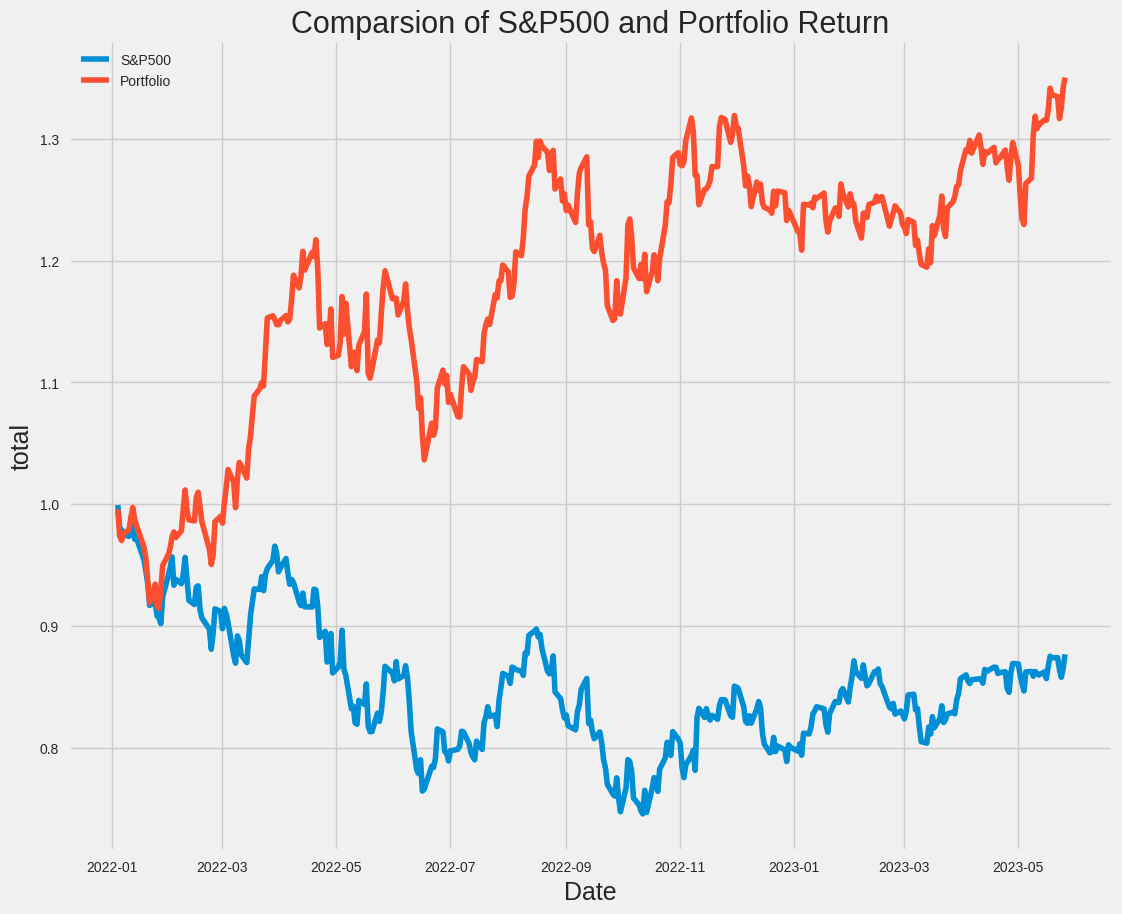

In [32]:
SMA = pd.DataFrame()

backtest_pf_return = 0
for ticker in df.columns:
    total_return = []
    backtest_get = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0])
    backtest = backtest_get.loc["2022-01-01":, :]
    for index in range(0, backtest.shape[0]):
        stock_return = ((backtest['Percent Change'] + 1).cumprod())[index]

        total_return.append(stock_return * df[ticker])

    SMA[ticker] = pd.DataFrame(total_return, index=backtest.index.to_list())   

SMA['total'] = SMA.sum(axis=1)

# Load sp500_df return data for comparing the returns of individual stocks
sp500 = web.DataReader('^GSPC',"2022-01-01", "2023-05-29")
sp500['Percent Change'] = sp500['Adj Close'].pct_change()

stocks_to_invest = ['S&P500', 'Portfolio']

plt.figure(figsize=(12, 10))

plt.plot((sp500['Percent Change']+1).cumprod())
plt.plot((SMA['total']))

plt.title("Comparsion of S&P500 and Portfolio Return", fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('total', fontsize = 18)
plt.legend(stocks_to_invest, loc = 'upper left')
plt.show()

# **Portfolio using Ichimoku Cloud**

In [33]:
## Reading the best performers from the Database
best_performers = pd.read_csv('./csvs/best_performers.csv')
best_performers

,Ticker,Returns Compared,Score
0,A,1.29,83.433735
1,AAPL,1.64,93.975904
2,ACN,1.39,87.349398
3,AJG,1.25,80.923695
4,ALB,2.26,98.594378
...,...,...,...
97,UPS,1.32,84.337349
98,URI,1.35,85.341365
99,WST,2.12,97.991968
100,ZBRA,1.57,92.670683


In [34]:
## Initializing the final_df DataFrame
final_df = pd.DataFrame(columns = ['Tickers', 'Latest_Price', 'Score'])

# We have to drop the peg ratio from our conditions because it was missing for some of the tickers and was giving error
# We could have pulled the beta value and make a condition out of it but due ti limitation of time couldn'e do it
for ticker in best_performers['Ticker']:
    try:
        df_get = pd.read_csv(f'stock_data/{ticker}.csv', index_col = 0)
        df = df_get.loc[:'2022-01-01',:]

        latest_price = df['Adj Close'][-1]
        conversion_line_period = 9
        base_line_period = 26
        leading_span_b_period = 52
        displacement = 26

        df['ConversionLine'] = (df['High'].rolling(window=conversion_line_period).max() +
                                  df['Low'].rolling(window=conversion_line_period).min()) / 2

        df['BaseLine'] = (df['High'].rolling(window=base_line_period).max() +
                            df['Low'].rolling(window=base_line_period).min()) / 2

        df['LeadingSpanA'] = (df['ConversionLine'] + df['BaseLine']) / 2

        df['LeadingSpanB'] = (df['High'].rolling(window=leading_span_b_period).max() +
                                df['Low'].rolling(window=leading_span_b_period).min()) / 2

        df['LaggingSpan'] = df['Adj Close'].shift(-displacement)
        score = round(best_performers[best_performers['Ticker'] == ticker]['Score'].tolist()[0])

        # Buy signal when the close price is above the cloud and the lagging span is above the cloud
        condition = (df['Adj Close'][-1] > df['LeadingSpanA'][-1]) & (df['Adj Close'][-1] > df['BaseLine'][-1])

        if condition:
          final_df = final_df.append({'Tickers': ticker,
                                      'Latest_Price': latest_price,
                                      'Score': score},
                                      ignore_index = True)
    except Exception as e:
        print(f"{e} for {ticker}")

In [ ]:
final_df.dropna(axis=1, inplace=True)
final_df.sort_values(by = 'Score', ascending = False, inplace=True)
pd.set_option('display.max_columns', 10)
final_df.to_csv('portfolio/portfolio2-MACD.csv')
final_df

In [36]:
# show the daily simple returns

my_stocks = final_df['Tickers']
portfolio = pd.DataFrame()

for ticker in my_stocks:
    df2 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    portfolio[ticker] = df2['Adj Close']

In [37]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Portfolio Optimization

# Calculate the expected returns and the annualized samplecovariance matrix of asset returns
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights

OrderedDict([('TSLA', 0.18497), ('EPAM', 0.0), ('FCX', 0.0), ('WST', 0.0), ('FTNT', 0.0), ('ANET', 0.05672), ('ODFL', 0.0), ('POOL', 0.0), ('TSCO', 0.05442), ('AMAT', 0.0), ('CDNS', 0.0), ('ON', 0.0), ('CRL', 0.0), ('SNPS', 0.0013), ('IDXX', 0.0), ('LRCX', 0.0), ('MOH', 0.0), ('AAPL', 0.0), ('KLAC', 0.0), ('EXR', 0.0), ('TECH', 0.0), ('ALGN', 0.0), ('ZBRA', 0.0), ('TER', 0.0), ('NOW', 0.0), ('CTLT', 0.0), ('AVGO', 0.0), ('MSFT', 0.0), ('LLY', 0.44179), ('IT', 0.0), ('DHR', 0.0), ('LEN', 0.0), ('GOOGL', 0.0), ('TRMB', 0.0), ('EFX', 0.0), ('MTD', 0.0), ('DHI', 0.0), ('JCI', 0.0), ('TMO', 0.0), ('RVTY', 0.0), ('CMG', 0.0), ('ACN', 0.0), ('BIO', 0.0), ('NDAQ', 0.0), ('COST', 0.0), ('TT', 0.0), ('PLD', 0.0), ('HD', 0.0), ('DPZ', 0.0), ('KEYS', 0.0), ('A', 0.0), ('SHW', 0.0), ('MOS', 0.0), ('LH', 0.0), ('AOS', 0.0), ('MCK', 0.26081), ('FDS', 0.0), ('AJG', 0.0), ('ZTS', 0.0), ('EL', 0.0)])


In [38]:
import numpy as np
df = pd.DataFrame(cleaned_weights, columns=cleaned_weights.keys(), index = [0])
df.replace(0.0, np.NaN, inplace=True)
df.dropna(axis=1, inplace=True)

df

,TSLA,ANET,TSCO,SNPS,LLY,MCK
0,0.18497,0.05672,0.05442,0.0013,0.44179,0.26081


In [ ]:
IchiMoku = pd.DataFrame()

backtest_pf_return = 0
for ticker in df.columns:
    total_return = []
    backtest_get = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0])
    backtest = backtest_get.loc["2022-01-01":, :]
    for index in range(0, backtest.shape[0]):
        stock_return = ((backtest['Percent Change'] + 1).cumprod())[index]

        total_return.append(stock_return * df[ticker])

    IchiMoku[ticker] = pd.DataFrame(total_return, index=backtest.index.to_list())   

IchiMoku['total'] = IchiMoku.sum(axis=1)

# Load sp500_df return data for comparing the returns of individual stocks
sp500 = web.DataReader('^GSPC',"2022-01-01", "2023-05-29")
sp500['Percent Change'] = sp500['Adj Close'].pct_change()

stocks_to_invest = ['S&P500', 'Portfolio']

plt.figure(figsize=(12, 10))

plt.plot((sp500['Percent Change']+1).cumprod())
plt.plot((IchiMoku['total']))

plt.title("Comparsion of S&P500 and Portfolio Return", fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('total', fontsize = 18)
plt.legend(stocks_to_invest, loc = 'upper left')
plt.show()

# **OBV** 

In [66]:
## Initializing the final_df DataFrame
final_df = pd.DataFrame(columns = ['Tickers', 'Latest_Price', 'Score', 'SMA_20', 'SMA_200', '52_week_low', '52_week_high'])

# We have to drop the peg ratio from our conditions because it was missing for some of the tickers and was giving error
# We could have pulled the beta value and make a condition out of it but due ti limitation of time couldn'e do it
for ticker in best_performers['Ticker']:
    try:
        df_get = pd.read_csv(f'stock_data/{ticker}.csv', index_col = 0)
        df = df_get.loc[:'2022-01-01',:]

        def calculate_stochastic(data, n=14):
          lowest_low = data['Low'].rolling(n).min()
          highest_high = data['High'].rolling(n).max()
          k = 100 * ((data['Close'] - lowest_low) / (highest_high - lowest_low))
          return k

        df['Stochastic'] = calculate_stochastic(df)

        moving_avg = [20, 200]
        for ma in moving_avg:
            df['SMA_'+str(ma)] = round(df['Adj Close'].rolling(window = int(ma)).mean(), 2)
        latest_price = df['Adj Close'][-1]
        moving_average_20 = df['SMA_20'][-1]
        moving_average_200 = df['SMA_200'][-1]
        low_52week = round(min(df['Low'][-(52*5):]), 2) # 5 days of trading times 52 week in a year
        high_52week = round(max(df['High'][-(52*5):]), 2)
        score = round(best_performers[best_performers['Ticker'] == ticker]['Score'].tolist()[0])

        buy_condition = df['Stochastic'].iloc[-1] < 20 and df['Stochastic'].iloc[-2] >= 20

        if buy_condition:
          final_df = final_df.append({'Tickers': ticker,
                                      'Latest_Price': latest_price,
                                      'Score': score,
                                      'SMA_20': moving_average_20,
                                      'SMA_200': moving_average_200,
                                      '52_week_low': low_52week,
                                      '52_week_high': high_52week}, 
                                        ignore_index = True)
    
    except Exception as e:
        print(f"{e} for {ticker}")

In [67]:
final_df.dropna(axis=1, inplace=True)
final_df.sort_values(by = 'Score', ascending = False, inplace=True)
pd.set_option('display.max_columns', 10)
final_df.to_csv('portfolio/portfolio1-SMA-PE.csv')
len(final_df)

3

In [68]:
# show the daily simple returns

my_stocks = final_df['Tickers']
portfolio = pd.DataFrame()

for ticker in my_stocks:
    df2 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    portfolio[ticker] = df2['Adj Close']

In [69]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Portfolio Optimization

# Calculate the expected returns and the annualized samplecovariance matrix of asset returns
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights

OrderedDict([('ENPH', 0.69571), ('DXCM', 0.30429), ('AMZN', 0.0)])


In [70]:
import numpy as np
df = pd.DataFrame(cleaned_weights, columns=cleaned_weights.keys(), index = [0])
df.replace(0.0, np.NaN, inplace=True)
df.dropna(axis=1, inplace=True)

df

,ENPH,DXCM
0,0.69571,0.30429


[*********************100%***********************]  1 of 1 completed


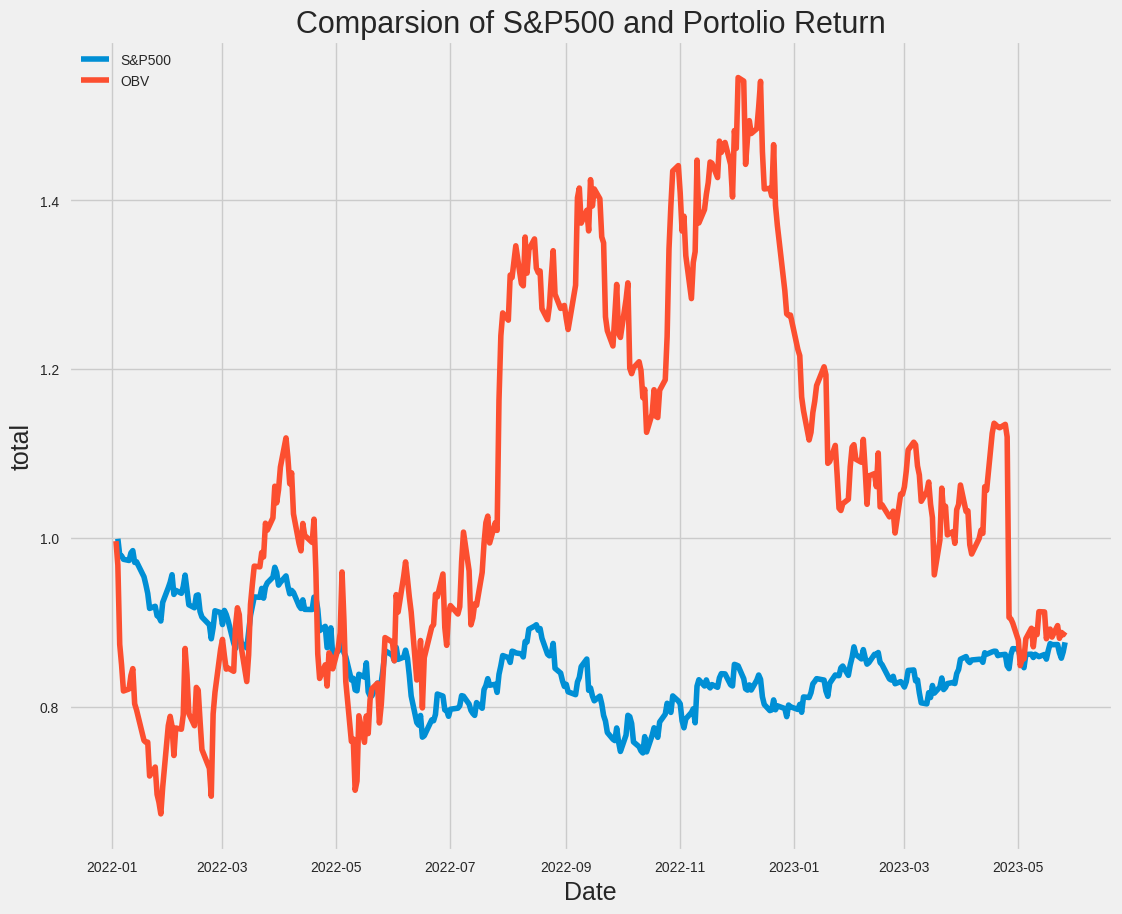

In [63]:
OBV = pd.DataFrame()

backtest_pf_return = 0
for ticker in df.columns:
    total_return = []
    backtest_get = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0])
    backtest = backtest_get.loc["2022-01-01":, :]
    for index in range(0, backtest.shape[0]):
        stock_return = ((backtest['Percent Change'] + 1).cumprod())[index]

        total_return.append(stock_return * df[ticker])

    OBV[ticker] = pd.DataFrame(total_return, index=backtest.index.to_list())   

OBV['total'] = OBV.sum(axis=1)

# Load sp500_df return data for comparing the returns of individual stocks
sp500 = web.DataReader('^GSPC',"2022-01-01", "2023-05-29")
sp500['Percent Change'] = sp500['Adj Close'].pct_change()

stocks_to_invest = ['S&P500', 'OBV']

plt.figure(figsize=(12, 10))

plt.plot((sp500['Percent Change']+1).cumprod())
plt.plot((OBV['total']))

plt.title("Comparsion of S&P500 and Portolio Return", fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('total', fontsize = 18)
plt.legend(stocks_to_invest, loc = 'upper left')
plt.show()

# **NO Techinical Analysis**

In [ ]:
## Reading the best performers from the Database
best_performers = pd.read_csv('./csvs/best_performers.csv')
best_performers

,Ticker,Returns Compared,Score
0,A,1.29,83.433735
1,AAPL,1.64,93.975904
2,ACN,1.39,87.349398
3,AJG,1.25,80.923695
4,ALB,2.26,98.594378
...,...,...,...
97,UPS,1.32,84.337349
98,URI,1.35,85.341365
99,WST,2.12,97.991968
100,ZBRA,1.57,92.670683


In [ ]:
## Initializing the final_df DataFrame
final_df = pd.DataFrame(columns = ['Tickers', 'Latest_Price', 'Score', 'SMA_150', 'SMA_200', '52_week_low', '52_week_high'])

# We have to drop the peg ratio from our conditions because it was missing for some of the tickers and was giving error
# We could have pulled the beta value and make a condition out of it but due ti limitation of time couldn'e do it
for ticker in best_performers['Ticker']:
    try:
        df_get = pd.read_csv(f'stock_data/{ticker}.csv', index_col = 0)
        df = df_get.loc[:'2022-01-01',:]
        moving_avg = [150, 200]
        for ma in moving_avg:
            df['SMA_'+str(ma)] = round(df['Adj Close'].rolling(window = int(ma)).mean(), 2)
        latest_price = df['Adj Close'][-1]
        moving_average_150 = df['SMA_150'][-1]
        moving_average_200 = df['SMA_200'][-1]
        low_52week = round(min(df['Low'][-(52*5):]), 2) # 5 days of trading times 52 week in a year
        high_52week = round(max(df['High'][-(52*5):]), 2)
        score = round(best_performers[best_performers['Ticker'] == ticker]['Score'].tolist()[0])

        final_df = final_df.append({'Tickers': ticker,
                                    'Latest_Price': latest_price,
                                    'Score': score,
                                    'SMA_150': moving_average_150,
                                    'SMA_200': moving_average_200,
                                    '52_week_low': low_52week,
                                    '52_week_high': high_52week}, 
                                      ignore_index = True)
    
    except Exception as e:
        print(f"{e} for {ticker}")

In [ ]:
final_df.dropna(axis=1, inplace=True)
final_df.sort_values(by = 'Score', ascending = False, inplace=True)
pd.set_option('display.max_columns', 10)
final_df.to_csv('portfolio/portfolio1-SMA-PE.csv')
final_df

,Tickers,Latest_Price,Score,SMA_150,SMA_200,52_week_low,52_week_high
31,ENPH,182.940002,100,185.09,174.75,108.88,282.46
95,TSLA,352.260010,100,274.17,260.68,179.83,414.50
64,MRNA,253.979996,100,313.08,273.86,102.66,497.49
35,ETSY,218.940002,99,214.98,209.52,153.80,307.75
4,ALB,231.820175,99,218.93,202.72,133.82,291.48
...,...,...,...,...,...,...,...
82,RHI,107.932114,80,98.73,94.18,60.47,120.83
19,CPT,171.980835,80,145.56,136.95,94.59,180.37
30,EL,365.555817,80,324.00,316.69,231.97,372.36
74,NXPI,221.957626,80,202.83,200.22,152.93,239.91


In [ ]:
# show the daily simple returns

my_stocks = final_df['Tickers']
portfolio = pd.DataFrame()

for ticker in my_stocks:
    df2 = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0]) 
    portfolio[ticker] = df2['Adj Close']

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Portfolio Optimization

# Calculate the expected returns and the annualized samplecovariance matrix of asset returns
mu = expected_returns.mean_historical_return(portfolio)
S = risk_models.sample_cov(portfolio)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
# Get discrete allocation of each share per stock
# need to install this package by running the command through terminal            conda install -c conda-forge cvxopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)
weights = cleaned_weights

OrderedDict([('ENPH', 0.0), ('TSLA', 0.08892), ('MRNA', 0.10569), ('ETSY', 0.0), ('ALB', 0.0), ('GNRC', 0.0), ('BBWI', 0.0), ('NVDA', 0.08041), ('FCX', 0.0), ('FTNT', 0.0), ('EPAM', 0.0), ('AMD', 0.0), ('WST', 0.0), ('SEDG', 0.0), ('MPWR', 0.0), ('PWR', 0.23929), ('ANET', 0.0), ('ODFL', 0.0), ('CDNS', 0.0), ('ON', 0.0), ('AMAT', 0.0), ('TSCO', 0.0), ('POOL', 0.0), ('LRCX', 0.0), ('DXCM', 0.0), ('IDXX', 0.0), ('INTU', 0.0), ('SNPS', 0.0), ('CRL', 0.0), ('KLAC', 0.0), ('MOH', 0.0), ('AAPL', 0.0), ('MSCI', 0.0), ('TECH', 0.0), ('ALGN', 0.0), ('ZBRA', 0.0), ('TER', 0.0), ('EXR', 0.0), ('LOW', 0.0), ('F', 0.0), ('AVGO', 0.0), ('CTLT', 0.0), ('NOW', 0.0), ('LLY', 0.31846), ('MSFT', 0.0), ('DHR', 0.0), ('QCOM', 0.0), ('IT', 0.0), ('NUE', 0.0), ('EQT', 0.03349), ('GOOG', 0.0), ('GOOGL', 0.0), ('LEN', 0.0), ('DHI', 0.0), ('MTD', 0.0), ('TRMB', 0.0), ('EFX', 0.0), ('RVTY', 0.0), ('JCI', 0.0), ('TMO', 0.0), ('AXON', 0.0), ('CMG', 0.0), ('ACN', 0.0), ('BIO', 0.0), ('NDAQ', 0.0), ('STX', 0.0), ('TT

In [ ]:
import numpy as np
df = pd.DataFrame(cleaned_weights, columns=cleaned_weights.keys(), index = [0])
df.replace(0.0, np.NaN, inplace=True)
df.dropna(axis=1, inplace=True)

df

,TSLA,MRNA,NVDA,PWR,LLY,EQT,MCK
0,0.08892,0.10569,0.08041,0.23929,0.31846,0.03349,0.13374


[*********************100%***********************]  1 of 1 completed


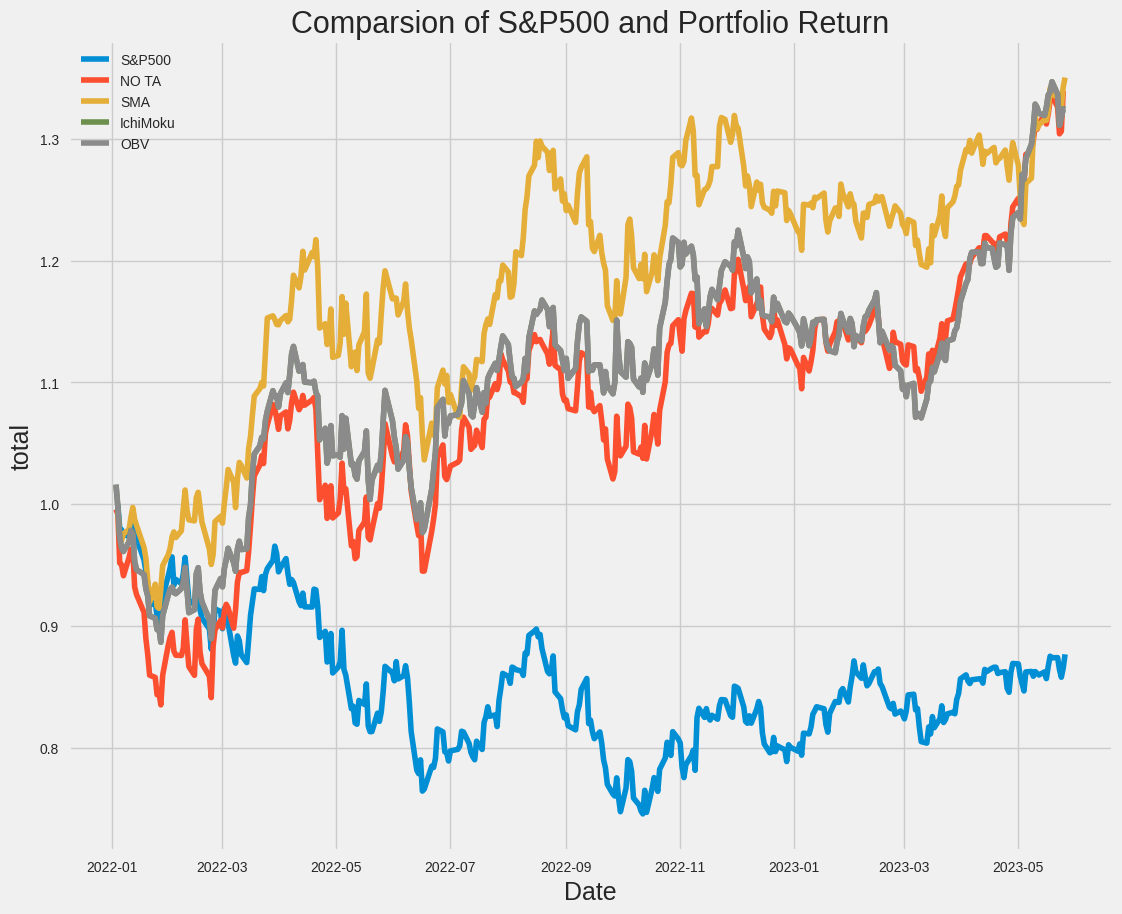

In [ ]:
withoutTA = pd.DataFrame()

backtest_pf_return = 0
for ticker in df.columns:
    total_return = []
    backtest_get = pd.read_csv(f"stock_data/{ticker}.csv", index_col = [0], parse_dates = [0])
    backtest = backtest_get.loc["2022-01-01":, :]
    for index in range(0, backtest.shape[0]):
        stock_return = ((backtest['Percent Change'] + 1).cumprod())[index]

        total_return.append(stock_return * df[ticker])

    withoutTA[ticker] = pd.DataFrame(total_return, index=backtest.index.to_list())   

withoutTA['total'] = withoutTA.sum(axis=1)

# Load sp500_df return data for comparing the returns of individual stocks
sp500 = web.DataReader('^GSPC',"2022-01-01", "2023-05-29")
sp500['Percent Change'] = sp500['Adj Close'].pct_change()

stocks_to_invest = ['S&P500', 'NO TA', 'SMA', 'IchiMoku', 'OBV']

plt.figure(figsize=(12, 10))

plt.plot((sp500['Percent Change']+1).cumprod())
plt.plot((withoutTA['total']))
plt.plot((SMA['total']))
plt.plot((IchiMoku['total']))
plt.plot((OBV['total']))

plt.title("Comparsion of S&P500 and Portfolio Return", fontsize = 22)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('total', fontsize = 18)
plt.legend(stocks_to_invest, loc = 'upper left')
plt.show()

In [ ]:
print("Portfolio return without Technical Analysis Conditions : ", withoutTA['total'][-1])
print("Portfolio return with SMA conditions: ", SMA['total'][-1])
print("Portfolio return with IchiMoku conditions: ", IchiMoku['total'][-1])
print("Portfolio return with OBV conditions: ", OBV['total'][-1])

Portfolio return without Technical Analysis Conditions :  1.3399145234731256
Portfolio return with SMA conditions:  1.350363740579579
Portfolio return with IchiMoku conditions:  1.3242916100690807
Portfolio return with OBV conditions:  1.3241381668549765
